# System Diagrams

In [1]:
%load_ext jupyter_tikz

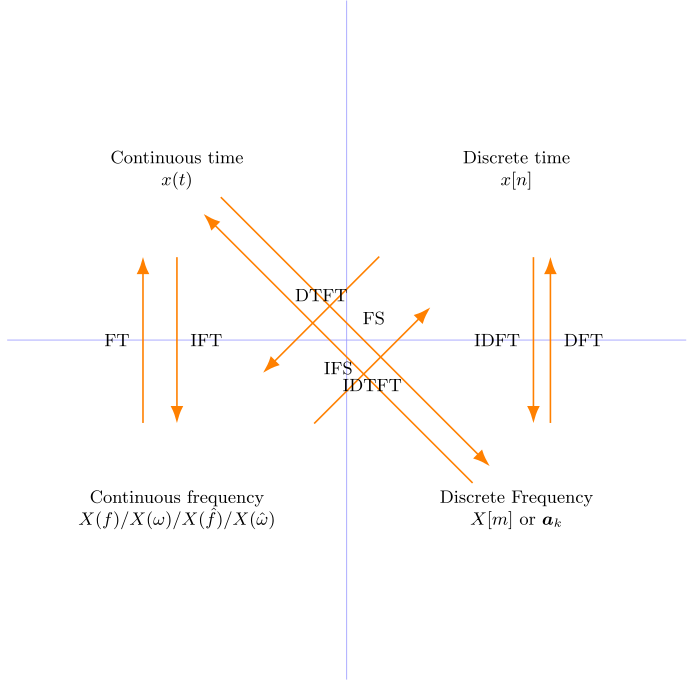

In [2]:
%%tikz -p=\include{prefix.tex} -sc=2 -S fourier_map.svg
\begin{tikzpicture}[
    scale=3,
    >=Latex,
    arrow/.style={orange, thick, -{Latex[length=3mm]}, shorten >=1pt, shorten <=1pt},
    textnode/.style={align=center, text=black}
]

% Crosshair
%\fill[black] (-2,-2) rectangle (2,2); % black background
\draw[blue!40, thin] (-2,0) -- (2,0);
\draw[blue!40, thin] (0,-2) -- (0,2);

% --- FT / IFT (left vertical) ---
\draw[arrow] (-1.2,-0.5) -- (-1.2,0.5) node[midway,left=3pt,black]{FT};
\draw[arrow] (-1.0,0.5) -- (-1.0,-0.5) node[midway,right=3pt,black]{IFT};

% --- FS / IFS (top horizontal) ---
\draw[arrow] (-0.75,0.85) -- (0.85,-0.75) node[midway,above right,black]{FS};
\draw[arrow] (0.75,-0.85) -- (-0.85,0.75) node[midway,below=3pt,black]{IFS};

% --- DTFT / IDTFT (bottom horizontal) ---
\draw[arrow] (0.2,0.5) -- (-0.5,-0.2) node[midway,above=3pt,black]{DTFT};
\draw[arrow] (-0.2,-0.5) -- (0.5,0.2) node[midway,below=3pt,black]{IDTFT};

% --- DFT / IDFT (right vertical) ---
\draw[arrow] (1.2,-0.5) -- (1.2,0.5) node[midway,right=3pt,black]{DFT};
\draw[arrow] (1.1,0.5) -- (1.1,-0.5) node[midway,left=3pt,black]{IDFT};

% --- Quadrant text ---
\node[textnode] at (-1,1) {Continuous time\\$x(t)$};
\node[textnode] at (1,1) {Discrete time\\$x[n]$};
\node[textnode] at (1,-1) {Discrete Frequency \\$X[m] \text{ or } \boldsymbol{a}_k$};
\node[textnode] at (-1,-1) {Continuous frequency\\$X(f) / X(\omega) / X(\hat{f}) / X(\hat{\omega})$};

\end{tikzpicture}


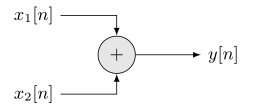

In [3]:
%%tikz -p=\include{prefix.tex} -sc=2 -S summation.svg
\begin{tikzpicture}[auto, node distance=25mm]

	% blocks 1st level
	\node[input] (in){};
    \node[sum, right of=in, xshift=0mm, yshift=-7mm](s0){$+$};
    \node[input, below of=in, yshift=11mm](in2){};
	\node[output, right of=s0, xshift=-10mm] (out){};
	
	% lines
	\draw[->] (in) node[left]{$x_1[n]$}-|(s0) node[above]{};
 	\draw[->] (in2) node[left]{$x_2[n]$}-|(s0) node[below]{};
   	\draw[->] (s0) node[right]{}--(out) node[right]{$y[n]$};
	
\end{tikzpicture}

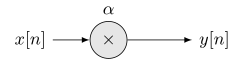

In [4]:
%%tikz -p=\include{prefix.tex}  -sc=2 -S multiply.svg
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
    \node[mul, right of=in, xshift=0mm, label={$\alpha$}](m0){$\times$};
	\node[output, right of=m0, xshift=-10mm] (out){};
	
	% lines
	\draw[->] (in) node[left]{$x[n]$}--(m0) node[left]{};
   	\draw[->] (m0) node[right]{}--(out) node[right]{$y[n]$};
\end{tikzpicture}

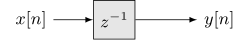

In [5]:
%%tikz -p=\include{prefix.tex} -sc=2 -S delay.svg
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[block, right of=in, minimum width=5mm, minimum height=7mm, xshift=-14mm](d1){$z^{-1}$};
	\node[output, right of=d1, xshift=-10mm] (out){};
	
	% lines
	\draw[->] (in) node[left]{$x[n]$}--(d1) node[left]{};
   	\draw[->] (d1) node[right]{}--(out) node[right]{$y[n]$};
\end{tikzpicture}

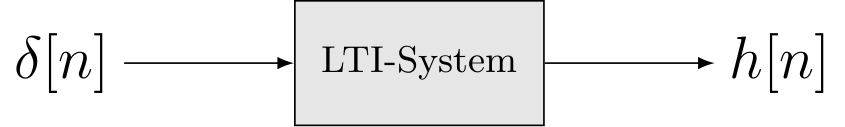

In [6]:
%%tikz -p=\include{prefix.tex} --dpi=300 -r -S impulse_response.png
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[block, right of=in](sys1){$\text{LTI-System}$};
	\node[output, right of=sys1] (out){};
	
	% lines
	\draw[->] (in) node[left]{\Large $\delta[n]$}--(sys1) node[left]{};
   	\draw[->] (sys1) node[right]{}--(out) node[right]{\Large $h[n]$};
\end{tikzpicture}

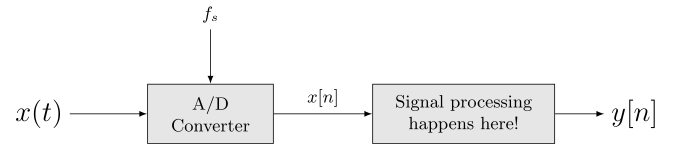

In [7]:
%%tikz -p=\include{prefix.tex}  -sc=2 -S  dsp_sys_figure.svg
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[block, right of=in, text width=2cm, align=center](sys1){A/D \\ Converter};
    \node[block, right of=sys1, xshift=20mm, text width=3cm, align=center](sys2){Signal processing \\ happens here!};
	\node[output, right of=sys2] (out){};
    \node[input, above of=sys1, yshift=-10mm] (fs){};
	
	% lines
	\draw[->] (in) node[left]{\Large $x(t)$}--(sys1) node[left]{};
    \draw[->] (sys1) node[left]{}--(sys2) node[midway]{$x[n]$};
   	\draw[->] (sys2) node[right]{}--(out) node[right]{\Large $y[n]$};
   	\draw[->] (fs) node[above]{$f_s$}--(sys1) node[above]{};
\end{tikzpicture}

In [8]:
%%tikz -p=\include{prefix.tex} --dpi=300 -r -S tapped_delay_line.png
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};                   
	\node[block, below of=c0, minimum width=5mm, minimum height=7mm, yshift=15mm](d0){$z^{-1}$};
    \node[block, below of=c0, minimum width=5mm, minimum height=7mm, yshift=15mm](d0){$z^{-1}$};
	\node[sum, right of=in, xshift=10mm, label={$b_0$}](b0){$\times$};
	\node[sum, right of=b0, xshift=10mm](s0){$+$};
	\node[sum, right of=s0, xshift=5mm](s0r){$+$};
    \node[mul, right of=s0r, xshift=30mm, label={$1/a_0$}](ma0){$\times$}; 
	\node[output, right of=ma0, xshift=-15mm] (out){};
	\node at ($(b0.west)-(1, 0)$) (c0){};
	\node at ($(ma0)-(.8, 0)$) (c0r){};

	% blocks 2nd level
	\node[block, below of=c0, minimum width=5mm, minimum height=7mm, yshift=15mm](d0){$z^{-1}$};
	\node[sum, below of=b0, yshift=-10mm, label={$b_1$}](b1){$\times$};
	\node[sum, below of=s0, yshift=-10mm](s1){$+$};
	\node[sum, below of=s0r, yshift=-10mm](s1r){$+$};
	\node[sum, right of=s1r, xshift=10mm, label={$- a_1$}](a1){$\times$};
	\node[block, below of=c0r, minimum width=5mm, minimum height=7mm, yshift=15mm](d0r){$z^{-1}$};
	
	% blocks M-th level
	\node[block, below of=d0, minimum width=5mm, minimum height=7mm, yshift=-5mm](d1){$z^{-1}$};
	\node[sum, below of=b1, yshift=-20mm, label={$b_M$}](b2){$\times$};
	\node[block, below of=d0r, minimum width=5mm, minimum height=7mm, yshift=-5mm](d1r){$z^{-1}$};
	\node[sum, below of=a1, yshift=-20mm, label={$-a_N$}](a2){$\times$};
	
	%lines
	\draw[->] (in) node[left]{$x[n]$}--(b0);
	\draw[->] (b0)--(s0);
	\draw[->] (s0)--(s0r);
	\draw[->] (s0r)--(ma0);
	\draw[->] (ma0)--(out) node[right]{$y[n]$};
	
	\draw[->] (c0.center)--(d0);
	\draw[->] (d0) |- (b1);
	\draw[->] (b1) -- (s1);
	\draw[->] (s1) -- (s0);
	\draw[->] (c0r.center) -- (d0r);
	\draw[->] (d0r) |- (a1);
	\draw[->] (a1) -- (s1r);
	\draw[->] (s1r) -- (s0r);
	
	\draw[->, dashed] (d0)--(d1);
	\draw[->] (d1) |- (b2);
	\draw[->, dashed] (b2) -| (s1);
	\draw (b2) -| ($(s1)-(0,1.5)$);
	
	\draw[->, dashed] (d0r)--(d1r);
	\draw[->] (d1r) |- (a2);
	\draw[->, dashed] (a2) -| (s1r);
	\draw (a2) -| ($(s1r)-(0,1.5)$);
	
	% delayed signals
	\node[below of=in, yshift=5mm, xshift=-2mm] {\tiny $x[n-1]$};
	\node[below of=in, yshift=-25mm, xshift=-1mm] {\tiny $x[n-N]$};
	\node[below of=ma0, yshift=5mm, xshift=2mm] {\tiny $y[n-1]$};
	\node[below of=ma0, yshift=-25mm, xshift=1mm] {\tiny $y[n-M]$};
	
	\node[right of=s0, yshift=-3mm, xshift=-18mm] {};
	
	\node[below of=b1, yshift=15mm]{\large $\vdots$};
	\node[below of=a1, yshift=15mm]{\large $\vdots$};

\end{tikzpicture}


(C:\Users\kaierih\AppData\Local\Programs\MiKTeX\tex/latex/amsfonts\umsa.fd)
(C:\Users\kaierih\AppData\Local\Programs\MiKTeX\tex/latex/amsfonts\umsb.fd)

! Package pgf Error: No shape named `c0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.7 ...mum height=7mm, yshift=15mm](d0){$z^{-1}$};
                                                  
? 
! Emergency stop.
 ...                                              
                                                  
l.7 ...mum height=7mm, yshift=15mm](d0){$z^{-1}$};
                                                  
!  ==> Fatal error occurred, no output PDF file produced!
Transcript written on 28e6cc153b1bc0a20ea862bc952e8a30.log.
